In [1]:
import gym
import gym_classics
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import deque
warnings.filterwarnings("ignore")

In [2]:
def tile_coding(state, params):
    low = [-1.2, -0.07]
    high = [0.6, 0.07]
    final_state = [0, 0]
    for i in range(2):
        state_range = high[i] - low[i]
        tile_len = state_range / params["tiles"][i]
        final_state[i] = int((state[i] - low[i]) // tile_len)
    return (final_state[0], final_state[1])

def choose_action(Q, state, params):
    if random.uniform(0,1) < params["epsilon"]:
        return np.random.choice(range(3))
    else:
        return np.argmax(Q[state[0],state[1],:])

def train(env, Q, params):
    tot_steps = 0
    done = False
    trunc = False
    state, info = env.reset()
    state = tile_coding(state, params)
    tot_reward = 0
    while not done and not trunc:
        action = choose_action(Q, state, params)
        nxt_state, reward, done, trunc, info = env.step(action)
        nxt_state = tile_coding(nxt_state, params)

        target = params["gamma"] * np.max(Q[nxt_state[0], nxt_state[1], :])
        if done: target = 0
        td_error = reward + target -  Q[state[0], state[1], action]
        Q[state[0], state[1], action] += params["alpha"] * td_error
        
        tot_reward += reward
        state = nxt_state
    params["epsilon"] *= np.exp(-params["decay_rate"])
    return tot_reward

In [11]:
params = {
    "alpha": 0.5,
    "gamma": 0.95,
    "epsilon": 1,
    "decay_rate": 0.005,
    "tiles": (20, 100),
}

EPISODES = 50
ROUNDS = 100
reward_list = np.zeros(EPISODES)
env = gym.make("MountainCar-v0")

Q = np.zeros((params["tiles"][0], params["tiles"][1], 3))
for i in tqdm(range(EPISODES)):
    for _ in range(ROUNDS):
        reward_list[i] += train(env, Q, params)
    print(reward_list[i]/ROUNDS)
reward_list /= ROUNDS

  2%|▏         | 1/50 [00:07<06:25,  7.87s/it]

-200.0


  4%|▍         | 2/50 [00:13<05:46,  7.22s/it]

-200.0


  6%|▌         | 3/50 [00:19<05:16,  6.74s/it]

-200.0


  8%|▊         | 4/50 [00:25<05:04,  6.62s/it]

-200.0


 10%|█         | 5/50 [00:30<04:29,  6.00s/it]

-200.0


 12%|█▏        | 6/50 [00:34<04:07,  5.63s/it]

-200.0


 14%|█▍        | 7/50 [00:39<03:50,  5.36s/it]

-200.0


 16%|█▌        | 8/50 [00:43<03:26,  4.90s/it]

-200.0


 18%|█▊        | 9/50 [00:47<03:16,  4.79s/it]

-197.68


 20%|██        | 10/50 [00:52<03:06,  4.67s/it]

-199.37


 22%|██▏       | 11/50 [00:56<02:54,  4.49s/it]

-197.95


 24%|██▍       | 12/50 [01:00<02:49,  4.46s/it]

-199.46


 26%|██▌       | 13/50 [01:05<02:44,  4.45s/it]

-198.21


 28%|██▊       | 14/50 [01:09<02:33,  4.27s/it]

-197.39


 30%|███       | 15/50 [01:13<02:33,  4.39s/it]

-197.77


 32%|███▏      | 16/50 [01:17<02:27,  4.35s/it]

-197.17


 34%|███▍      | 17/50 [01:21<02:17,  4.16s/it]

-196.7


 36%|███▌      | 18/50 [01:26<02:15,  4.24s/it]

-198.8


 38%|███▊      | 19/50 [01:30<02:11,  4.23s/it]

-198.18


 40%|████      | 20/50 [01:33<01:58,  3.94s/it]

-189.51


 42%|████▏     | 21/50 [01:38<01:59,  4.14s/it]

-196.07


 44%|████▍     | 22/50 [01:42<01:57,  4.20s/it]

-195.93


 46%|████▌     | 23/50 [01:46<01:49,  4.05s/it]

-189.15


 48%|████▊     | 24/50 [01:50<01:46,  4.12s/it]

-191.08


 50%|█████     | 25/50 [01:54<01:41,  4.05s/it]

-186.16


 52%|█████▏    | 26/50 [01:58<01:36,  4.01s/it]

-186.66


 54%|█████▍    | 27/50 [02:05<01:55,  5.01s/it]

-194.37


 56%|█████▌    | 28/50 [02:18<02:42,  7.37s/it]

-197.24


 58%|█████▊    | 29/50 [02:27<02:43,  7.80s/it]

-193.67


 60%|██████    | 30/50 [02:32<02:18,  6.91s/it]

-193.87


 62%|██████▏   | 31/50 [02:35<01:52,  5.91s/it]

-181.57


 64%|██████▍   | 32/50 [02:38<01:28,  4.89s/it]

-175.26


 66%|██████▌   | 33/50 [02:41<01:13,  4.35s/it]

-182.9


 68%|██████▊   | 34/50 [02:51<01:36,  6.04s/it]

-184.13


 70%|███████   | 35/50 [02:58<01:36,  6.44s/it]

-193.23


 72%|███████▏  | 36/50 [03:08<01:45,  7.57s/it]

-176.51


 74%|███████▍  | 37/50 [03:16<01:37,  7.51s/it]

-189.96


 76%|███████▌  | 38/50 [03:22<01:26,  7.21s/it]

-182.04


 78%|███████▊  | 39/50 [03:30<01:21,  7.38s/it]

-174.18


 80%|████████  | 40/50 [03:37<01:13,  7.34s/it]

-176.03


 82%|████████▏ | 41/50 [03:49<01:16,  8.50s/it]

-175.38


 84%|████████▍ | 42/50 [03:54<01:01,  7.74s/it]

-181.87


 86%|████████▌ | 43/50 [04:00<00:49,  7.14s/it]

-186.58


 88%|████████▊ | 44/50 [04:11<00:50,  8.37s/it]

-190.0


 90%|█████████ | 45/50 [04:18<00:38,  7.79s/it]

-178.98


 92%|█████████▏| 46/50 [04:25<00:29,  7.50s/it]

-168.61


 94%|█████████▍| 47/50 [04:33<00:23,  7.73s/it]

-171.26


 96%|█████████▌| 48/50 [04:37<00:13,  6.68s/it]

-173.14


 98%|█████████▊| 49/50 [04:42<00:06,  6.19s/it]

-173.53


100%|██████████| 50/50 [04:51<00:00,  5.83s/it]

-170.19


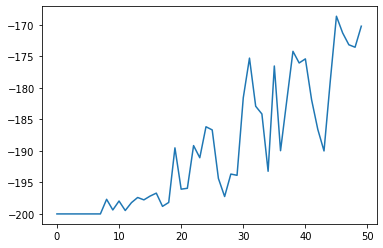

In [12]:
plt.plot(reward_list)
plt.show()

In [14]:
# test model
env = gym.make('MountainCar-v0', render_mode = "human")
state, info = env.reset()
state = tile_coding(state, params)
done = False
trunc = False
rewards = 0
while not done and not trunc:
    action = np.argmax(Q[state[0],state[1],:])
    new_state, reward, done, trunc, info = env.step(action)
    new_state = tile_coding(new_state, params)
    rewards += reward
    state = new_state
    env.render()
    if done:
        break
env.close()
print(int(abs(rewards)), "steps")

147 steps
